(-30.64887416377706, 30.64887416377707, -8.113841585282799, 26.319476530017916)

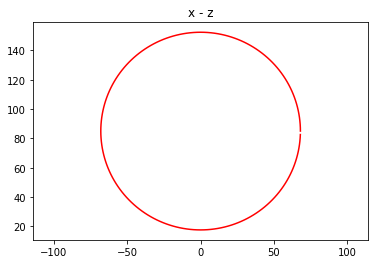

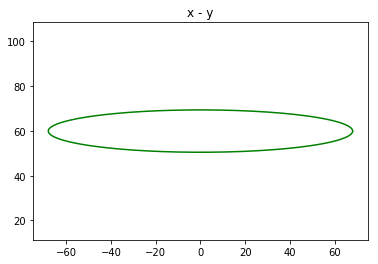

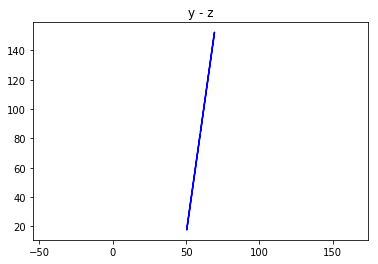

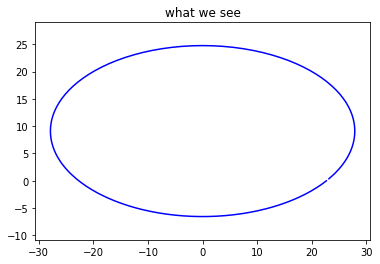

In [14]:
import math
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt




def tan_deg( tan ):
    tan_in_degree = math.radians(tan)
    return math.tan(tan_in_degree)

def sin_deg( sin ):
    sin_in_degree = math.radians(sin)
    return math.sin(sin_in_degree)

def cos_deg( cos ):
    cos_in_degree = math.radians(cos)
    return math.cos(cos_in_degree)

def atan_deg(atan): 
    atan_rad = math.atan(atan)
    return math.degrees(atan_rad)
def acos_deg(acos): 
    acos_rad = math.acos(acos)
    return math.degrees(acos_rad)

def vec_add (vec1 , vec2):
    a0 = vec1[0] + vec2[0]
    a1 = vec1[1] + vec2[1]
    a2 = vec1[2] + vec2[2]
    return (a0 , a1 , a2)

def polar_to_cartesian( r , theta):
    y = 0 ;
    x = r * cos_deg(theta)
    z = r * sin_deg(theta)
    return (x , y , z)

def inner(vec1 , vec2): 
    return vec1[0]*vec2[0] + vec1[1]*vec2[1] + vec1[2]*vec2[2]
def vec_abs (vec):
    sq = vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2]
    return math.sqrt(sq)
def normal (vec): 
    mag = vec_abs(vec)
    return (vec[0]/mag , vec[1]/mag , vec[2]/mag)


resx = np.array([])
resy = np.array([])
resz = np.array([])


    

A = 0
B = 54.81
#A = -78.1314
#B = 5.1217
#rpm = 12 
rpm = 11.7
omega = 6 * rpm

tilt = 8
yaw = 0 

#r = 0.345 * 0.75 
r = 68
#distance_to_nose = 5.98
distance_to_nose = 104
#in order to be consistent with tracking code
aprime = 90 + A 
t = 90 - tilt
#############################################
#CALCULATING NOSE VECTORS 

x_nose = distance_to_nose * cos_deg(B) * sin_deg(-A)
y_nose = distance_to_nose * cos_deg(B) * cos_deg(-A)
z_nose = distance_to_nose * sin_deg(B)

#############################################
for theta in range(0,360,2):
    resx = np.append(resx , [x_nose + r*sin_deg(theta)*cos_deg(t)*cos_deg(aprime+yaw) + r*cos_deg(theta)*cos_deg(aprime+yaw-90)])
    resy = np.append(resy , [y_nose + r*sin_deg(theta)*cos_deg(t)*sin_deg(aprime+yaw) + r*cos_deg(theta)*sin_deg(aprime+yaw-90)])
    resz = np.append(resz , [z_nose + r*sin_deg(theta)*sin_deg(t)])
    

#resx = -resx
#ax.plot3D(resx, resy, resz, 'gray')
plt.plot(resx,resz , 'red') # x - z
plt.title('x - z')
plt.axis('equal')
plt.figure()
plt.plot(resx,resy,'green') # x - y
plt.title('x - y')
plt.axis('equal')
plt.figure()
plt.plot(resy,resz , 'blue')# y - z
plt.title('y - z')
plt.axis('equal')

#find what we see ###########################################
perspective_x = np.array([])
perspective_y = np.array([])
perspective_z = np.array([])
magnitude = np.array([])
angle = np.array([])

perspect_x = np.array([])
perspect_y = np.array([])

ref_x = 0 
ref_y = 0 
ref_z = 0 

for i,j in enumerate(resx): 
    m = vec_abs((x_nose, y_nose , z_nose))**2 / (3*inner((resx[i],resy[i],resz[i]),(x_nose,y_nose,z_nose)))
    perspective_x = np.append(perspective_x , [m * resx[i]])
    perspective_y = np.append(perspective_y , [m * resy[i]])
    perspective_z = np.append(perspective_z , [m * resz[i]])
    if(i == 0): 
        ref_x = perspective_x[i] - x_nose / 3
        ref_y = perspective_y[i] - y_nose / 3
        ref_z = perspective_z[i] - z_nose / 3
        magnitude = np.append(magnitude, [vec_abs((ref_x,ref_y,ref_z))])
        angle = np.append(angle, [0])
    else: 
        nonref_x = perspective_x[i] - x_nose / 3
        nonref_y = perspective_y[i] - y_nose / 3
        nonref_z = perspective_z[i] - z_nose / 3
        vec_ref = (ref_x,ref_y,ref_z)
        vec_nonref = (nonref_x,nonref_y,nonref_z)
        alpha = acos_deg(inner(vec_ref,vec_nonref)/(vec_abs(vec_ref)*vec_abs(vec_nonref)))
        magnitude = np.append(magnitude, [vec_abs((nonref_x,nonref_y,nonref_z))])
        if((ref_z - nonref_z) < 0): 
            alpha = 360 - alpha
        angle = np.append(angle, [alpha])
        

for i,j in enumerate(resx): 
    perspect_x = np.append(perspect_x , [magnitude[i] * cos_deg(angle[i])])
    perspect_y = np.append(perspect_y , [magnitude[i] * sin_deg(angle[i])])
    
plt.figure()
plt.plot(perspect_x , perspect_y , 'blue')# y - z
plt.title('what we see')
plt.axis('equal')



In [17]:
#set theta to an arbitrary point 
theta = 0 

x = x_nose + r*sin_deg(theta)*cos_deg(t)*cos_deg(aprime+yaw) + r*cos_deg(theta)*cos_deg(aprime+yaw-90)
y = y_nose + r*sin_deg(theta)*cos_deg(t)*sin_deg(aprime+yaw) + r*cos_deg(theta)*sin_deg(aprime+yaw-90)
z = z_nose + r*sin_deg(theta)*sin_deg(t)

xdot = r*omega*cos_deg(theta)*cos_deg(t)*cos_deg(aprime+yaw) - r*omega*sin_deg(theta)*cos_deg(aprime+yaw-90)
ydot = r*omega*cos_deg(theta)*cos_deg(t)*sin_deg(aprime+yaw) - r*omega*sin_deg(theta)*sin_deg(aprime+yaw-90)
zdot = r*omega*cos_deg(theta)*sin_deg(t)

tanb = z/math.sqrt(x**2 + y**2)

bdot = (2*z*zdot*(x**2 + y**2) - z**2 * (2*x*xdot + 2*y*ydot))/(2*tanb*(1+tanb**2)*(x**2 + y**2)**2)

print("B speed at 0 degrees: %f" %(bdot))

theta = 90

x = x_nose + r*sin_deg(theta)*cos_deg(t)*cos_deg(aprime+yaw) + r*cos_deg(theta)*cos_deg(aprime+yaw-90)
y = y_nose + r*sin_deg(theta)*cos_deg(t)*sin_deg(aprime+yaw) + r*cos_deg(theta)*sin_deg(aprime+yaw-90)
z = z_nose + r*sin_deg(theta)*sin_deg(t)

xdot = r*omega*cos_deg(theta)*cos_deg(t)*cos_deg(aprime+yaw) - r*omega*sin_deg(theta)*cos_deg(aprime+yaw-90)
ydot = r*omega*cos_deg(theta)*cos_deg(t)*sin_deg(aprime+yaw) - r*omega*sin_deg(theta)*sin_deg(aprime+yaw-90)
zdot = r*omega*cos_deg(theta)*sin_deg(t)
tana = y/x
adot = (ydot * x - xdot * y)/((x**2) * (1+tana**2))

print("A speed at 90 degrees: %f" %(adot))




B speed at 0 degrees: 25.333226
A speed at 90 degrees: 68.785945
